     x     y
0  5.9  3.20
1  4.6  2.90
2  6.2  2.80
3  4.7  3.20
4  5.5  4.20
5  5.0  3.00
6  4.9  3.10
7  6.7  3.10
8  5.1  3.81
9  6.0  3.00
[[5.9  3.2 ]
 [4.6  2.9 ]
 [6.2  2.8 ]
 [4.7  3.2 ]
 [5.5  4.2 ]
 [5.   3.  ]
 [4.9  3.1 ]
 [6.7  3.1 ]
 [5.1  3.81]
 [6.   3.  ]]
Initial Centroids
(3, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12.537144692236463
 Centre of the clusters after  1  Iteration 
 [[5.1714287 3.172857 ]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
Error  ...  1.5886142
 Centre of the clusters after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.005]
 [6.2   3.025]]
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
Error  ...  0.5469943
 Centre of the clusters after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.005]
 [6.2   3.025]]
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
Error  ...  0.0


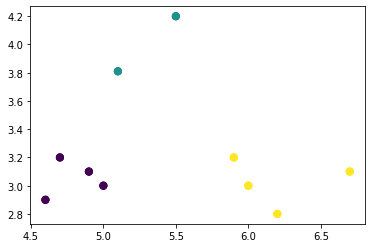

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from copy import deepcopy
from sklearn.cluster import KMeans


def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

k = 3
X = pd.read_csv('data.csv',index_col=False)
print(X)
x1 = X['x'].values
x2 = X['y'].values
X = np.array(list(zip(x1, x2)))
print(X)
C_x = [6.2, 6.6 ,6.5]
C_y = [3.2, 3.7, 3.0]
Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(Centroid.shape)
Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)
clusters = np.zeros(len(X))
print(clusters)
error = euclidean(Centroid, Centroid_old, None)
print(error)
iterr = 0
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    iterr = iterr + 1
    for i in range(len(X)):
        #print(X[i])
        distances = euclidean(X[i], Centroid)
        #print(distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    Centroid_old = deepcopy(Centroid)
        
    # Finding the new centroids by taking the Mean
    for p in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == p]
        Centroid[p] = np.mean(points, axis=0)
    print(" Centre of the clusters after ", iterr," Iteration \n", Centroid)
    error = euclidean(Centroid, Centroid_old, None)
    labels = KMeans(3, random_state=0).fit_predict(X)
    mtp.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
    print(clusters)
    print("Error  ... ",error)  